In [49]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
# Load the data
stellar = pd.read_csv(r"C:\Users\maxsu\Capstone 2\star_classification.csv")

In [29]:
#First look at data
stellar.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [30]:
#Checking for any missing values
stellar.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [31]:
#Datatypes of each column
stellar.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [32]:
#Checking the counts for each class
stellar['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [33]:
#Checking dimensionality of dataframe
stellar.shape

(100000, 18)

In [34]:
#Dropping Object_ID
stellar.drop(['obj_ID'], axis = 1, inplace = True)
stellar.head()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [35]:
#Min value for each column
pd.DataFrame(stellar.values.min(0)[None, :], columns=stellar.columns)

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,0.005528,-18.785328,-9999.0,-9999.0,9.82207,9.469903,-9999.0,109,301,1,11,299519089380976640.0,GALAXY,-0.009971,266,51608,1


In [36]:
#Max value for each column
pd.DataFrame(stellar.values.max(0)[None, :], columns=stellar.columns)

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,359.99981,83.000519,32.78139,31.60224,29.57186,32.14147,29.38374,8162,301,6,989,14126940609093851136.0,STAR,7.011245,12547,58932,1000


In [37]:
#Looking at the remaining 17 variables we can eliminate quite a few of them outright as they describe the equipment ID's run Id's, etc...
stellar = stellar.drop(columns = ['run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'fiber_ID'])
stellar.head()

,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123,6121,56187


In [38]:
#DATA VISUALIZATION

<Axes: xlabel='class', ylabel='Count'>

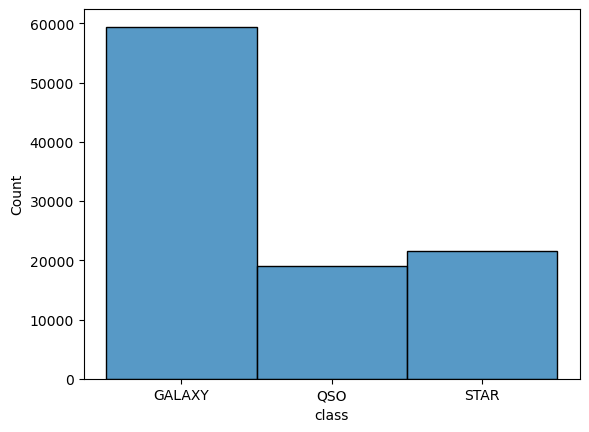

In [39]:
#Histogram of value counts
sns.histplot(data = stellar, x = 'class')

C:\Users\maxsu\AppData\Local\Temp\ipykernel_3644\3726523046.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stellar.corr(),annot=True,linewidths=1)


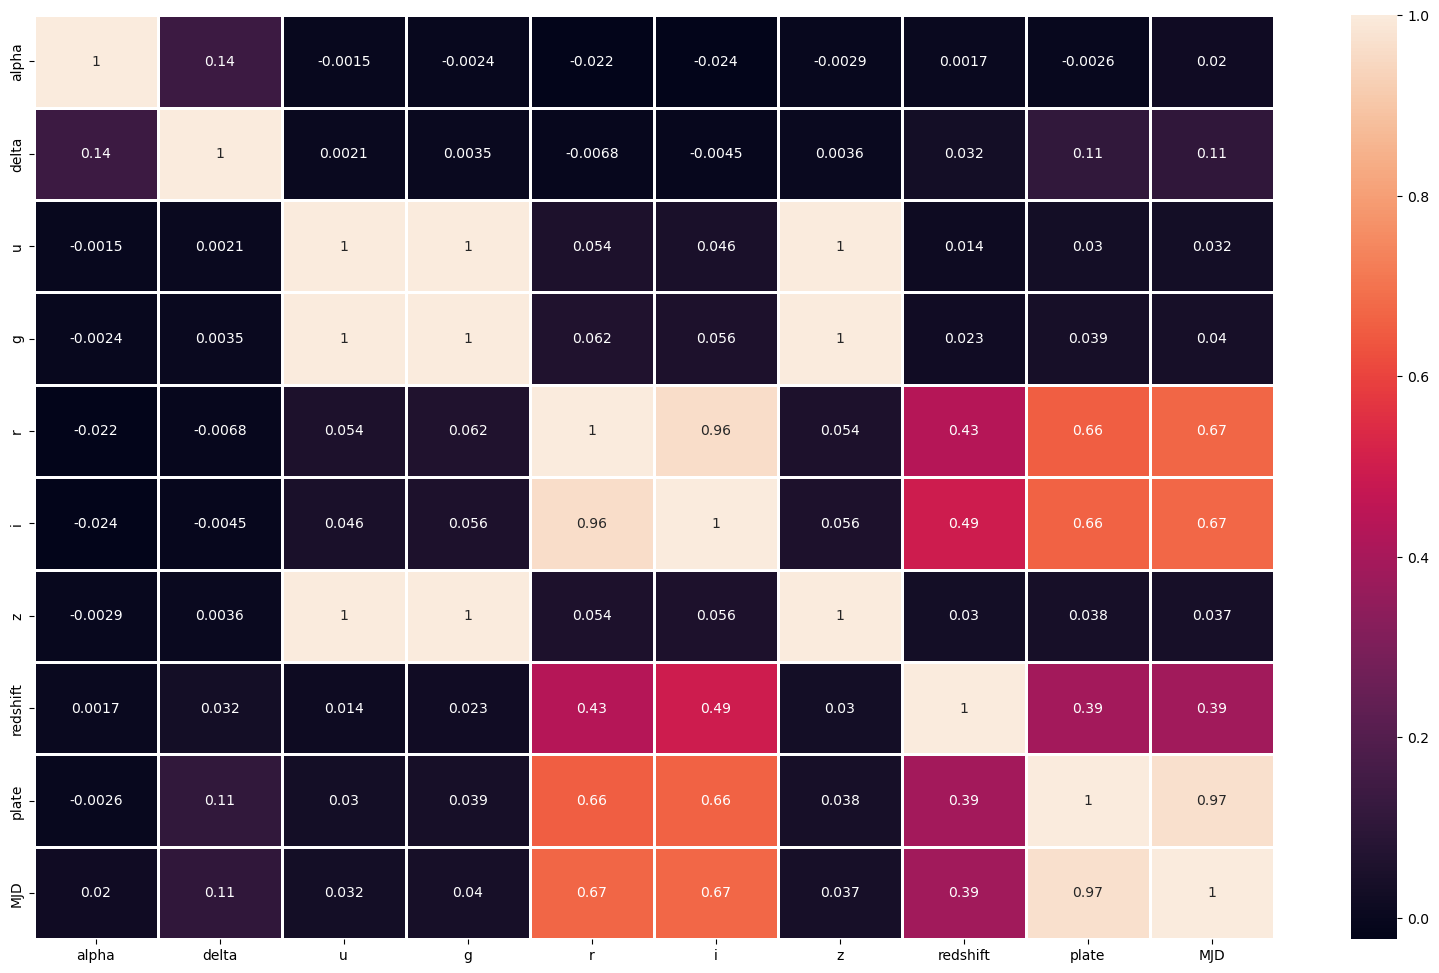

In [40]:
#Heatmap of the correlation between variables
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(stellar.corr(),annot=True,linewidths=1)
plt.show()

In [41]:
#From this map I am choosing ('u', 'g', 'r', 'i', 'z', 'redshift', 'plate' and 'MJD') as the features to use in my model so I will drop the rest
stellar = stellar.drop(columns= ['alpha', 'delta'])
stellar.head()

,u,g,r,i,z,class,redshift,plate,MJD
0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,5812,56354
1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,10445,58158
2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,4576,55592
3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,9149,58039
4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123,6121,56187


In [42]:
#I am going to to perform dependent variable encoding to change the strings to integers
LE = preprocessing.LabelEncoder()
stellar['class'] = LE.fit_transform(stellar['class'])
stellar['class'].value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

In [43]:
#I will then train_test_split and scale the features
X = stellar.drop(['class'], axis = 1)
y = stellar['class'].values

sc = preprocessing.StandardScaler()
X = sc.fit_transform(X)


X_train,X_test,y_train,y_test = train_test_split(X , y , test_size=0.3 , random_state=0)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (70000, 8)
X_test (30000, 8)
y_train (70000,)
y_test (30000,)


In [44]:
# I am creating a dataframe with the accuracy score along with which model so the findings will be easier to convey
results = pd.DataFrame(columns=['Model', 'Accuracy'])


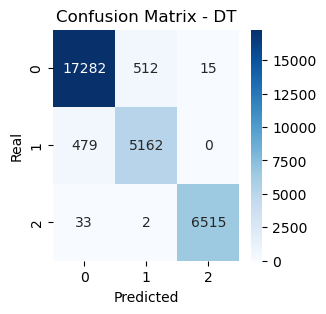

C:\Users\maxsu\AppData\Local\Temp\ipykernel_3644\4089033372.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model':'Decision Tree', 'Accuracy':accuracy_dt}, ignore_index = True)


,Model,Accuracy
0,Decision Tree,0.9653


In [45]:
#Decision Tree CLassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
con_matrix_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(3, 3))
sns.heatmap(con_matrix_dt, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix - DT')
plt.show()

results = results.append({'Model':'Decision Tree', 'Accuracy':accuracy_dt}, ignore_index = True)
results

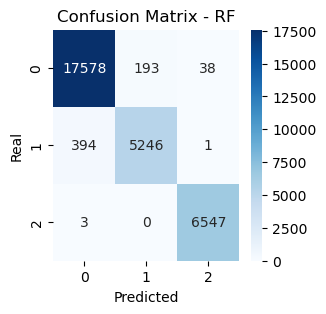

C:\Users\maxsu\AppData\Local\Temp\ipykernel_3644\4207863698.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model':'Random Forest', 'Accuracy':accuracy_rf}, ignore_index = True)


,Model,Accuracy
0,Decision Tree,0.965300
1,Random Forest,0.979033


In [46]:
#Random Forest CLassifier
rf = RandomForestClassifier(n_estimators=100 ,criterion='entropy')
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
con_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(3, 3))
sns.heatmap(con_matrix_rf, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix - RF')
plt.show()

results = results.append({'Model':'Random Forest', 'Accuracy':accuracy_rf}, ignore_index = True)
results

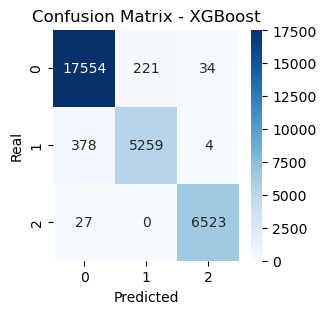

C:\Users\maxsu\AppData\Local\Temp\ipykernel_3644\4065643197.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model':'XGBoost', 'Accuracy':accuracy_xgb}, ignore_index = True)


,Model,Accuracy
0,Decision Tree,0.965300
1,Random Forest,0.979033
2,XGBoost,0.977867


In [47]:
#XGBoost CLassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
con_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(3, 3))
sns.heatmap(con_matrix_xgb, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix - XGBoost')
plt.show()

results = results.append({'Model':'XGBoost', 'Accuracy':accuracy_xgb}, ignore_index = True)
results

In [51]:
#KNN CLassifier
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)

    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    
    print(f'K: {i}, Accuracy: {accuracy_knn}')

K: 1, Accuracy: 0.9486666666666667
K: 2, Accuracy: 0.9437
K: 3, Accuracy: 0.9570333333333333
K: 4, Accuracy: 0.9552
K: 5, Accuracy: 0.9584666666666667
K: 6, Accuracy: 0.9560666666666666
K: 7, Accuracy: 0.9582333333333334
K: 8, Accuracy: 0.9559333333333333
K: 9, Accuracy: 0.9574666666666667
K: 10, Accuracy: 0.9555333333333333
K: 11, Accuracy: 0.9564333333333334
K: 12, Accuracy: 0.9544666666666667
K: 13, Accuracy: 0.955
K: 14, Accuracy: 0.9533
K: 15, Accuracy: 0.9540333333333333
K: 16, Accuracy: 0.9528
K: 17, Accuracy: 0.9534
K: 18, Accuracy: 0.9517666666666666
K: 19, Accuracy: 0.9521
K: 20, Accuracy: 0.9509
K: 21, Accuracy: 0.9515666666666667
K: 22, Accuracy: 0.9512333333333334
K: 23, Accuracy: 0.951
K: 24, Accuracy: 0.9502666666666667


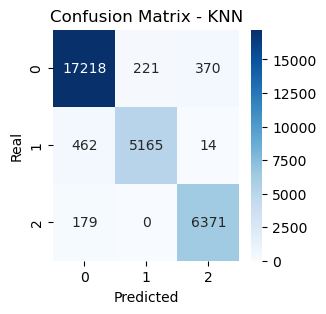

C:\Users\maxsu\AppData\Local\Temp\ipykernel_3644\92105538.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model':'KNN', 'Accuracy':accuracy_knn}, ignore_index = True)


,Model,Accuracy
0,Decision Tree,0.965300
1,Random Forest,0.979033
2,XGBoost,0.977867
3,KNN,0.958467


In [52]:
# From the above info I will be choosing k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
con_matrix_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(3, 3))
sns.heatmap(con_matrix_knn, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix - KNN')
plt.show()

results = results.append({'Model':'KNN', 'Accuracy':accuracy_knn}, ignore_index = True)
results